# Time-series plotting

到目前为止，在所有部分中，我们的可视化都集中在并使用了数值变量：分类变量（属于一组桶）或区间变量（属于值的区间）。 在这个笔记本中，我们将探索另一种类型的变量：时间序列变量。

In [1]:
import pandas as pd
pd.set_option('max_columns', None)
import numpy as np

## Types of time series variables (时间序列变量的类型)

时间序列变量由特定于某个时间点的值填充。 时间是线性的，无限细粒度，所以真正的时间序列值是区间变量的一种特殊情况。

日期可以通过几种不同的方式显示在数据集中。 我们将研究这款笔记本中最常见的两种方式。

在“强大的案例”中，日期充当数据集的显式索引。 一个很好的例子是关于股票价格的以下数据集：

In [2]:
stocks = pd.read_csv("./input/prices.csv", parse_dates=['date'])
stocks = stocks[stocks['symbol'] == "GOOG"].set_index('date')
stocks.head()

,symbol,open,close,low,high,volume
date,,,,,,
2010-01-04,GOOG,626.951088,626.751061,624.241073,629.511067,3927000.0
2010-01-05,GOOG,627.181073,623.991055,621.541045,627.841071,6031900.0
2010-01-06,GOOG,625.861078,608.261023,606.361042,625.861078,7987100.0
2010-01-07,GOOG,609.401025,594.101005,592.651008,610.001045,12876600.0
2010-01-08,GOOG,592.000997,602.021036,589.110988,603.251034,9483900.0


该数据集按日期编制索引：正在收集的数据在一天的“期间”内收集。 记录中的值提供该期间内该股票的信息。

对于像这样的日常数据，使用这样的日期很方便。 但从技术上讲，一段时间可以持续很长一段时间。 `pandas`提供了一个完整的专用类型，`pandas.Period``dtype`（文件[here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Period.html)）， 对于这个概念。

在“弱势案例”中，日期充当时间戳：它们告诉我们观察发生的时间。 例如，在以下动物收容所结果数据集中，有两列，“datetime”和“date_of_birth”，它们描述了观察中动物的事实。

In [3]:
shelter_outcomes = pd.read_csv(
    "./input/aac_shelter_outcomes.csv", 
    parse_dates=['date_of_birth', 'datetime']
)
shelter_outcomes = shelter_outcomes[
    ['outcome_type', 'age_upon_outcome', 'datetime', 'animal_type', 'breed', 
     'color', 'sex_upon_outcome', 'date_of_birth']
]
shelter_outcomes.head()

,outcome_type,age_upon_outcome,datetime,animal_type,breed,color,sex_upon_outcome,date_of_birth
0,Transfer,2 weeks,2014-07-22 16:04:00,Cat,Domestic Shorthair Mix,Orange Tabby,Intact Male,2014-07-07
1,Transfer,1 year,2013-11-07 11:47:00,Dog,Beagle Mix,White/Brown,Spayed Female,2012-11-06
2,Adoption,1 year,2014-06-03 14:20:00,Dog,Pit Bull,Blue/White,Neutered Male,2013-03-31
3,Transfer,9 years,2014-06-15 15:50:00,Dog,Miniature Schnauzer Mix,White,Neutered Male,2005-06-02
4,Euthanasia,5 months,2014-07-07 14:04:00,Other,Bat Mix,Brown,Unknown,2014-01-07


换句话说，库存数据会在一段时间内汇总，因此更改时间会显着改变数据。 在动物结局案例中，信息是“记录级别”; 日期是描述性事实，改变它们没有意义。

## Visualizing by grouping(通过分组进行可视化)

我之前说过，时间是区间变量的“特例”。 这是否意味着我们可以使用前面部分中熟悉的工具和技术以及时间序列数据？ 当然！

例如，这是一个线图，可视化数据集中最常见的出生日期。

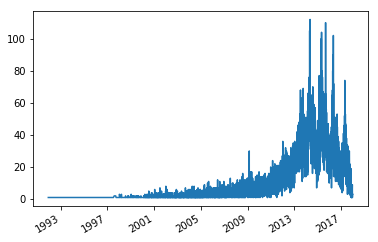

In [5]:
shelter_outcomes['date_of_birth'].value_counts().sort_values().plot.line()

它看起来像2015年左右数据集峰值中动物的出生日期，但很难确定，因为数据相当嘈杂。

目前数据是白天的，但如果我们将所有日期汇总到几年呢？ 这被称为**重采样**。 我们可以这样做来调整数据集，生成按年汇总的结果。 在`pandas`，`resample`中执行此操作的方法非常简单。 有很多潜在的重采样选项：我们将使用`Y`，这是“年”的缩写。

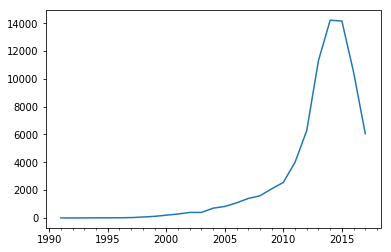

In [6]:
shelter_outcomes['date_of_birth'].value_counts().resample('Y').sum().plot.line()

更清楚！ 看起来，实际上，2014年和2015年在数据集中的存在几乎相同。

这演示了重新采样的数据可视化优势：通过选择某些时段，您可以更清晰地显示数据集的某些方面。

请注意，`pandas`会自动调整x轴上的标签以匹配我们的输出类型。 这是因为`pandas`是“日期时间感知”; 它知道，当我们将数据点间隔开一年时，我们只想看标签中的年份，而不是别的！

通常，通过这种分组来暴露时间序列数据的值。 例如，这是一个类似的简单条形图，它查看了`GOOG`股票的交易量：

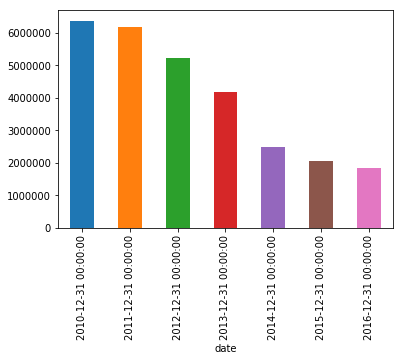

In [7]:
stocks['volume'].resample('Y').mean().plot.bar()

在可视化中使用日期的大多数“新东西”归结为一些新的数据处理技术。 因为时间戳是“只是”区间变量，所以理解日期时间数据不需要任何新奇的可视化技术！

## Some new plot types(一些新的情节类型)

### Lag plot(滞后情节)

其中一种情节类型是滞后图。 滞后图将数据集中每个观察的数据点与先前观察的数据点进行比较。 例如，将12月21日的数据与12月20日的数据进行比较，然后将数据与12月19日的数据进行比较，依此类推。 例如，以下是我们在对股票数据中的交易量（交易数量）应用滞后图时所看到的情况：

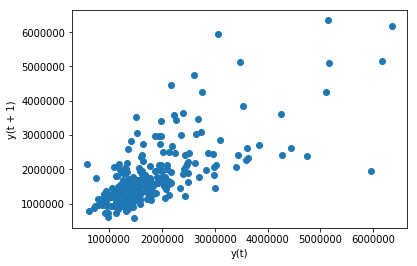

In [8]:
from pandas.plotting import lag_plot

lag_plot(stocks['volume'].tail(250))

看起来像体积高的日子在某种程度上彼此相关。 疯狂交易的一天确实表明第二天也将涉及疯狂的交易。

时间序列数据倾向于表现出称为**周期性**的行为：数据中的上升和峰值与时间相关。 例如，健身房可能会在每个工作日结束时看到出勤率增加，因此表现出一天的周期性。 一家酒吧可能会在周五看到销售量的增长，在一周内呈现周期性。 等等。

滞后图非常有用，因为它们是检查此类周期性数据集的简单方法。

请注意，它们仅适用于“强案例”时间序列数据。

### Autocorrelation plot(自相关图)

采用这一概念并且更进一步的情节类型是自相关图。 自相关图是一个多变量摘要类型图，可让您同时检查*每个*周期。 它通过计算摘要统计数据来实现这一点 - 相关分数＆mdash;跨越数据集中的每个可能的延迟。 这被称为自相关。

在自相关图中，滞后在x轴上，自相关分数在y轴上。 自相关距离0越远，记录彼此远离的影响就越大。

以下是应用于库存量数据时自相关图的样子：

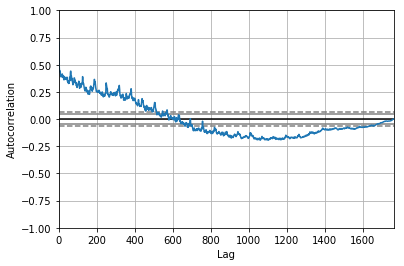

In [9]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(stocks['volume'])

看起来交易活动量与前一年的交易量呈微弱下降关系。 数据集中没有任何显着的非随机峰值，因此这是一个很好的证据，表明随着时间的推移，交易活动量没有太多的时间序列模式。

当然，在这个简短的可选部分中，我们只是简单介绍了使用时间序列数据可以做些什么。 关于如何处理时间序列变量的整个文献我们在这里没有讨论。 但这些是基础知识，希望足以让您开始分析您自己的时间相关数据！

## Exercises

In [11]:
import pandas as pd

crypto = pd.read_csv("./input/crypto-markets.csv")
crypto = crypto[crypto['name'] == 'Bitcoin']
crypto['date'] = pd.to_datetime(crypto['date'])
crypto.head()

,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
0,bitcoin,BTC,Bitcoin,2013-04-28,1,135.30,135.98,132.10,134.21,0.0,1.500520e+09,0.5438,3.88
1,bitcoin,BTC,Bitcoin,2013-04-29,1,134.44,147.49,134.00,144.54,0.0,1.491160e+09,0.7813,13.49
2,bitcoin,BTC,Bitcoin,2013-04-30,1,144.00,146.93,134.05,139.00,0.0,1.597780e+09,0.3843,12.88
3,bitcoin,BTC,Bitcoin,2013-05-01,1,139.00,139.89,107.72,116.99,0.0,1.542820e+09,0.2882,32.17
4,bitcoin,BTC,Bitcoin,2013-05-02,1,116.38,125.60,92.28,105.21,0.0,1.292190e+09,0.3881,33.32


尝试回答以下问题。 单击下面单元格上的“输出”按钮以查看答案。

*时间序列变量真的是其他类型变量的特例吗？  
*为什么重采样在数据可视化上下文中有用？  
*什么是滞后？ 什么是自相关？

时间序列数据实际上是区间数据的特例。

重新采样通常在数据可视化中很有用，因为它可以通过聚合在不同的级别来帮助清理和去噪我们的绘图。

滞后是数据集中每个观察的时间差。 自相关是应用于滞后的相关性。

对于接下来的练习，请尝试使用此笔记本并复制后面的图表。 

描绘住房结果中的日期时间列的折线图按年汇总。

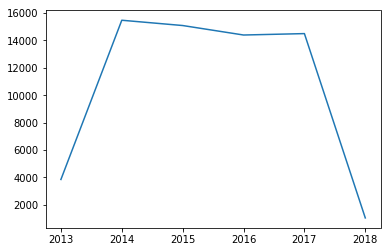

In [12]:
shelter_outcomes['datetime'].value_counts().resample('Y').count().plot.line()

加密货币（加密）交易量从最近250天开始的滞后图（提示：使用尾部）。

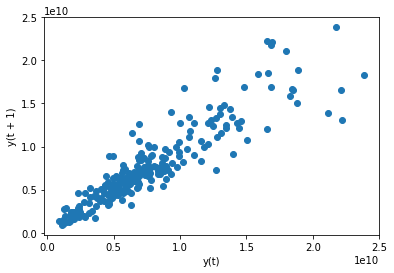

In [13]:
lag_plot(crypto['volume'].tail(250))

加密货币（加密）交易量的自相关图。

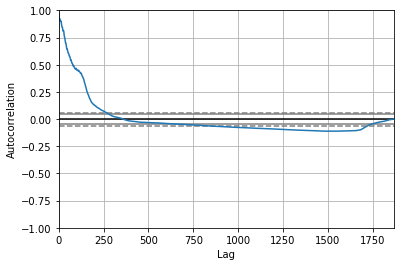

In [14]:
autocorrelation_plot(crypto['volume'])